In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Régression

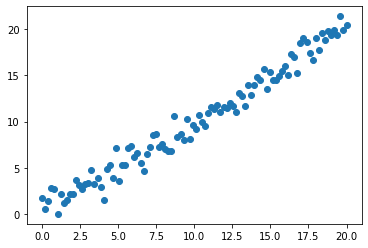

In [2]:
np.random.seed(0) # avec une graine fixée pour rendre le calcul reproductible
                  # certes cela fonctionne mais vous souvenez-vous de la "bonne" méthode ?
m = 100
X = np.linspace(0, 20, m).reshape(-1,1) # reshape 2D
y = X + np.random.randn(m, 1)

plt.scatter(X, y)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression() # construction
model.fit(X, y) # entrainement
R2 = model.score(X, y) # évaluation; retourne le coefficient de corrélation
R2 # le score est ici le R^2 de la méthode des moindres carrés

0.9703537814132045

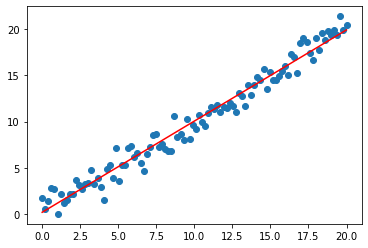

In [5]:
plt.scatter(X, y) # on trace le tout pour voir comment notre modèle est 'bon'
plt.plot(X, model.predict(X), c='red')

# Classification

In [6]:
# Le jeu de données 'titanic' est aussi disponible via seaborn
# import seaborn as sns
# data = sns.load_dataset('titanic')

In [7]:
data = pd.read_csv('./inputs/titanic.csv')
data

Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   
..          ...       ...     ...     ...   ...    ...    ...      ...   
886         886         0       2    male  27.0      0      0  13.0000   
887         887         1       1  female  19.0      0      0  30.0000   
888         888         0       3  female   NaN      1      2  23.4500   
889         889         1       1    male  26.0      0      0  30.0000   
890         890         0       3    male  32.0      0      0   7.7500   

    embarked   class    who  adult_male deck  embark_town alive  alone  
0          S   Third    man        True  NaN  Southampton    no  False  
1          C   First  woman       False    C    Cherbourg   yes  False  
2          S   Third  woman       False  NaN  Southampton   yes   True  
3          S   First  woman       False    C  Southampton   yes  False  
4          S   Third    man        True  NaN  Southampton    no   True  
..       ...     ...    ...         ...  ...          ...   ...    ...  
886        S  Second    man        True  NaN  Southampton    no   True  
887        S   First  woman       False    B  Southampton   yes   True  
888        S   Third  woman       False  NaN  Southampton    no  False  
889        C   First    man        True    C    Cherbourg   yes   True  
890        Q   Third    man        True  NaN   Queenstown    no   True  

[891 rows x 16 columns]

In [8]:
# petit nettoyage uniquement des colonnes qui vont nous servirent à travailler
data.dropna(axis=0, inplace=True, subset=['survived', 'pclass', 'sex', 'age'])
data.head()

Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True

In [9]:
data['sex_num'] = data['sex'] # on ajoute une colonne pour ne pas perdre les données d'origine
data['sex_num'].replace(['male', 'female'], [0, 1], inplace=True) # il nous faut une valeur numérique
data.head()

Unnamed: 0  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0           0         0       3    male  22.0      1      0   7.2500        S   
1           1         1       1  female  38.0      1      0  71.2833        C   
2           2         1       3  female  26.0      0      0   7.9250        S   
3           3         1       1  female  35.0      1      0  53.1000        S   
4           4         0       3    male  35.0      0      0   8.0500        S   

   class    who  adult_male deck  embark_town alive  alone  sex_num  
0  Third    man        True  NaN  Southampton    no  False        0  
1  First  woman       False    C    Cherbourg   yes  False        1  
2  Third  woman       False  NaN  Southampton   yes   True        1  
3  First  woman       False    C  Southampton   yes  False        1  
4  Third    man        True  NaN  Southampton    no   True        0

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# construction des 'features' et des 'labels'
X = data[['pclass', 'sex_num', 'age']]
y = data['survived']

In [12]:
model = KNeighborsClassifier() # construction
model.fit(X, y) # entrainement
model.score(X, y) # évaluation (score en % de bonnes prédictions sur les données)

0.8417366946778712

In [13]:
def did_you_survived(model, pclass, sex_num, age):
    x = np.array([pclass, sex_num, age]).reshape(1, 3) # cela passe aussi avec juste numpy mais avec warnings
    x = pd.DataFrame([[pclass, sex_num, age]], columns=['pclass', 'sex_num', 'age'])
    # predic_proba n'est pas disponible sur tous les modèles
    return model.predict(x), model.predict_proba(x)

In [14]:
survived, probas = did_you_survived(model, 1, 0, 46)
print(f"had survived: {survived}")
print(f"survival probas: {probas}")

had survived: [0]
survival probas: [[0.8 0.2]]


## A-t-on de bons hyperparamètres ?

Text(0.5, 1.0, 'Score en fonction du nombre de voisins K')

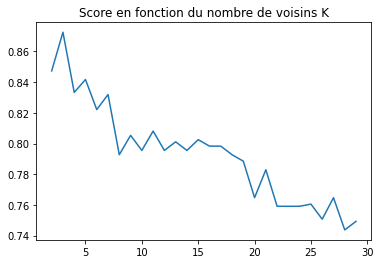

In [15]:
score = pd.DataFrame(columns=['k', 'value'])
score.k = np.arange(2,30)
score.value = score.value.astype('float64', copy=False)
for row in score.itertuples():
    model = KNeighborsClassifier(n_neighbors=row.k)
    model.fit(X, y)
    # pas top de calculer un score sur les données d'entrainement; pourquoi ?
    score.at[row.Index, 'value'] = model.score(X, y) 
plt.plot(score.k, score.value)
plt.title("Score en fonction du nombre de voisins K")

In [16]:
best_k = score.loc[score.value.idxmax(),'k'] # do not use argmax https://www.reddit.com/r/learnpython/comments/9ykk7r/pandas_idxmax_vs_argmax/
best_k

3

In [17]:
# on va utiliser best_k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

## Et qu'est-ce que ça donne sur les différents âges ?

In [18]:
x2 = pd.DataFrame(columns=['pclass', 'sex_num', 'age'])

In [19]:
pclass = 1  # paramètres de notre simulation
sex_num = 0

x2['age'] = np.arange(1,100)
x2['pclass'] = pclass
x2['sex_num'] = sex_num
y2 = model.predict_proba(x2)[:,1] # on ne garde que la colonne 'survived'

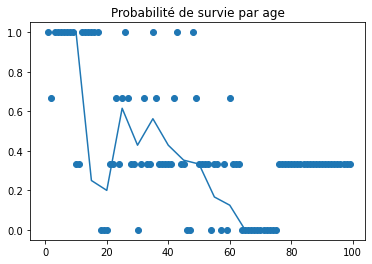

In [20]:
bins= np.arange(0,100,5)
data['age_group'] = pd.cut(data['age'], bins=bins, labels=bins[:-1], include_lowest= True, right=False)
# labels helps to get numerical value in age_group not interval like [10, 20)
selection = (data['sex_num']==sex_num) & (data['pclass']==pclass)
plt.plot(data[selection].groupby('age_group')['survived'].mean())
plt.title("Probabilité de survie par age")
plt.scatter(x2['age'], y2)

In [21]:
data[selection].groupby('age_group')['survived'].mean()

age_group
0     1.000000
5          NaN
10    1.000000
15    0.250000
20    0.200000
25    0.615385
30    0.428571
35    0.562500
40    0.428571
45    0.352941
50    0.333333
55    0.166667
60    0.125000
65    0.000000
70    0.000000
75         NaN
80    1.000000
85         NaN
90         NaN
Name: survived, dtype: float64